In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [55]:
def end_of_time(probability_of_birth, probability_of_death, probability_of_murder, population):
    Birth = probability_of_birth * population
    Death = probability_of_death * population + probability_of_murder * population * (population - 1)
    Lambda = Birth + Death
    end_time =  100 * population / Lambda
    return end_time

In [56]:
def LogisticSimulator(r, K, P0):
    return lambda t : K*P0/(K*math.exp(-r*t)+P0*(1-math.exp(-r*t)))

In [76]:
def LS(b, d, m, p, e, l):
    x_grid = np.linspace(start=0, stop=e, num=l)
    y_grid = list(map(LogisticSimulator(b - d, (b - d) / m, p), x_grid))
    return x_grid, y_grid

In [58]:
def Simulator(probability_of_birth, probability_of_death, probability_of_murder, population, end_time):
    time = 0
    x_grid = [0]
    y_grid = [population]
    while (population > 0 and time < end_time):
        Birth = probability_of_birth * population
        Death = probability_of_death * population + probability_of_murder * population * (population - 1)
        Lambda = Birth + Death
        delta_t = np.random.exponential(1 / Lambda) 
        time += delta_t
        Type = np.random.binomial(1, Birth / (Death + Birth))
        if Type == 1:
            population += 1
        else:
            population -= 1
        x_grid.append(time)
        y_grid.append(population)
    return x_grid, y_grid

In [59]:
def print_data(probability_of_birth, probability_of_death, probability_of_murder, population, end_time):
    print("probability of birth:", probability_of_birth)
    print("probability of death:", probability_of_death)
    print("probability of murder:", probability_of_murder)
    print("population:", population)
    print("end time:", end_time)
    plt.title("Logistic function and simulator")
    plt.xlabel("time")
    plt.ylabel("population")

In [117]:
def graphics(b, d, m, p, e):
    plt.figure(figsize=(15,15))
    grid1 = plt.grid(True)
    random.seed(42)
    if e == 0:
        e = end_of_time(b, d, m, p)
    print_data(b, d, m, p, e)
    colors = ["red", "green", "blue", "orange", "pink"]
    for i in range(5):
        x_grid, y_grid = Simulator(b, d, m, p, e)
        plt.plot(x_grid, y_grid, colors[i])
        print(i + 1, "done")
    if m != 0:
        x_grid, y_grid = LS(b, d, m, p, e, 101)
        plt.plot(x_grid, y_grid, "black")
    plt.show()

In [123]:
def difference_graph(b, d, m, p, e):
    plt.figure(figsize=(15,15))
    grid1 = plt.grid(True)
    random.seed(42)
    if e == 0:
        e = end_of_time(b, d, m, p)
    print_data(b, d, m, p, e)
    colors = ["red", "green", "blue", "orange", "pink"]
    x_grid_LS, y_grid_LS = LS(b, d, m, p, e, 101)
    for i in range(5):
        x_grid, y_grid = Simulator(b, d, m, p, e)
        for j in range(len(y_grid)):
            y_grid[j] = y_grid[j] - y_grid_LS[101 * j // len(y_grid)]
        plt.plot(x_grid, y_grid, colors[i])
        print(i + 1, "done")
    plt.show()

probability of birth: 0.4
probability of death: 0.2
probability of murder: 0.0002
population: 1500
end time: 111.13580795732385
1 done
2 done
3 done
4 done
5 done


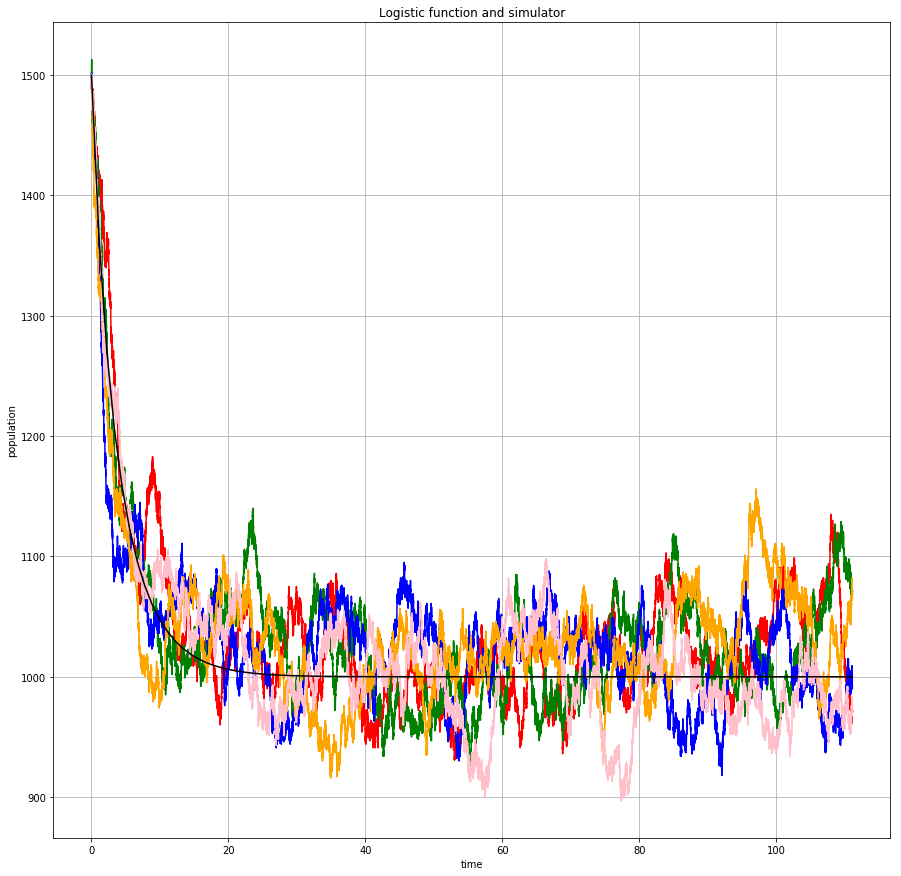

In [61]:
graphics(0.4, 0.2, 0.0002, 1500, 0)

probability of birth: 0.4
probability of death: 0.2
probability of murder: 0.0002
population: 500
end time: 142.89797084881397
1 done
2 done
3 done
4 done
5 done


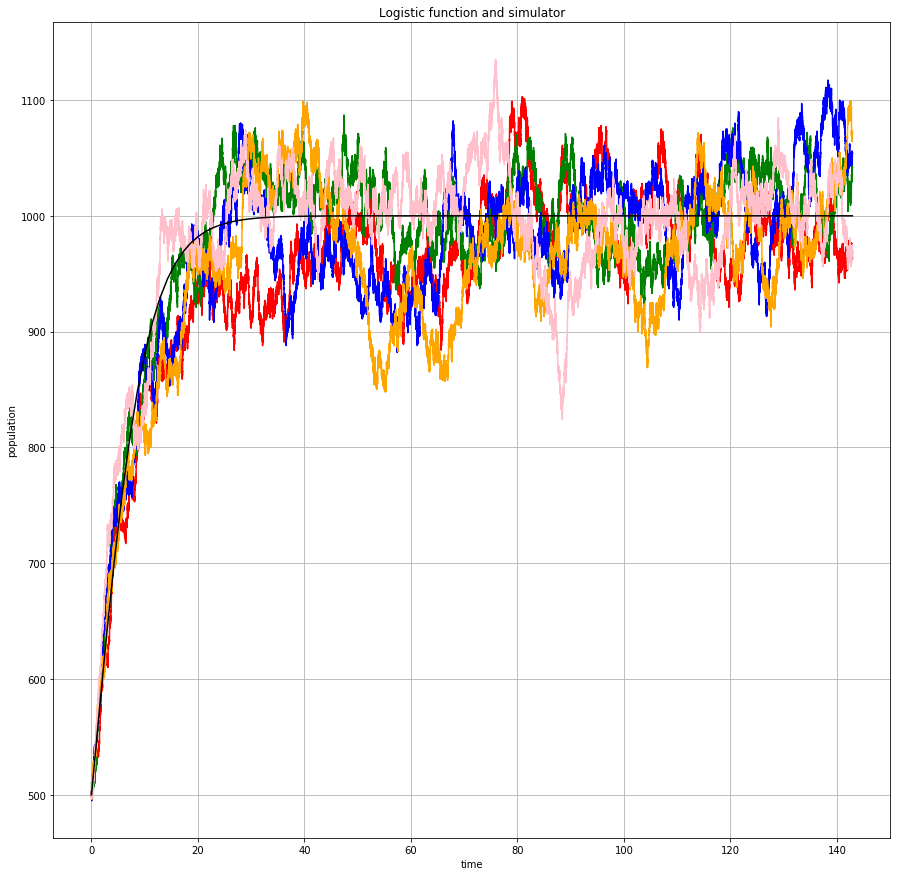

In [62]:
graphics(0.4, 0.2, 0.0002, 500, 0)

probability of birth: 0.4
probability of death: 0.2
probability of murder: 0.0002
population: 1000
end time: 125.03125781445362
1 done
2 done
3 done
4 done
5 done


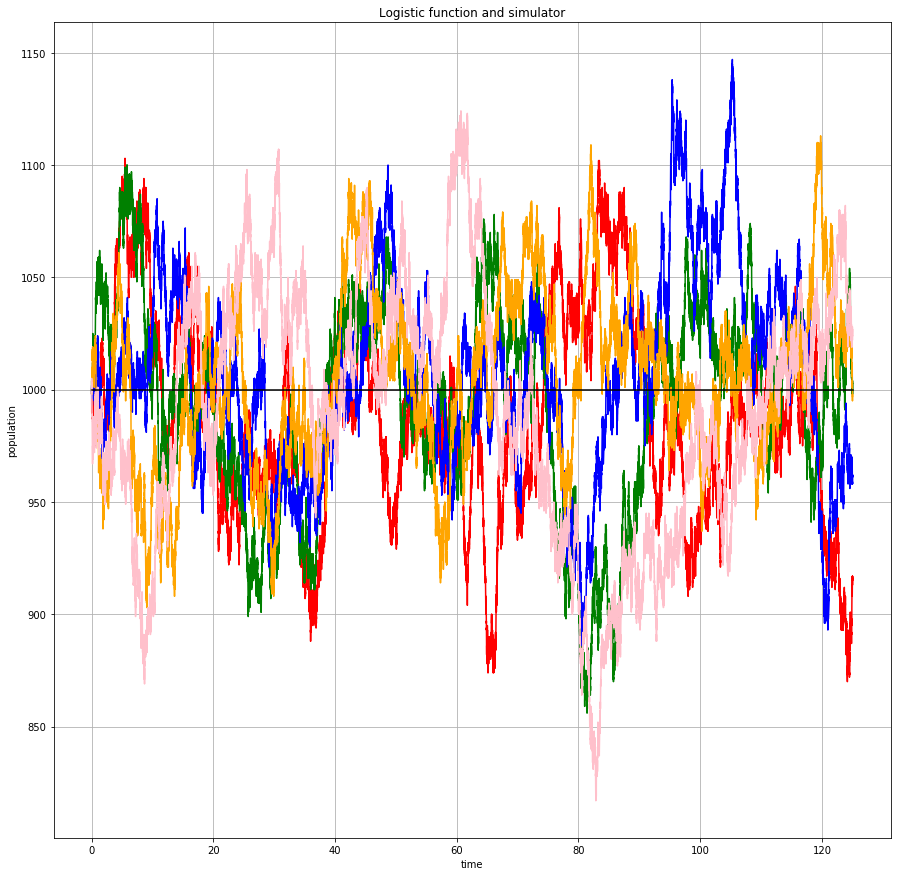

In [63]:
graphics(0.4, 0.2, 0.0002, 1000, 0)

probability of birth: 0.4
probability of death: 0.5
probability of murder: 0.0002
population: 1000
end time: 90.92562284051647
1 done
2 done
3 done
4 done
5 done


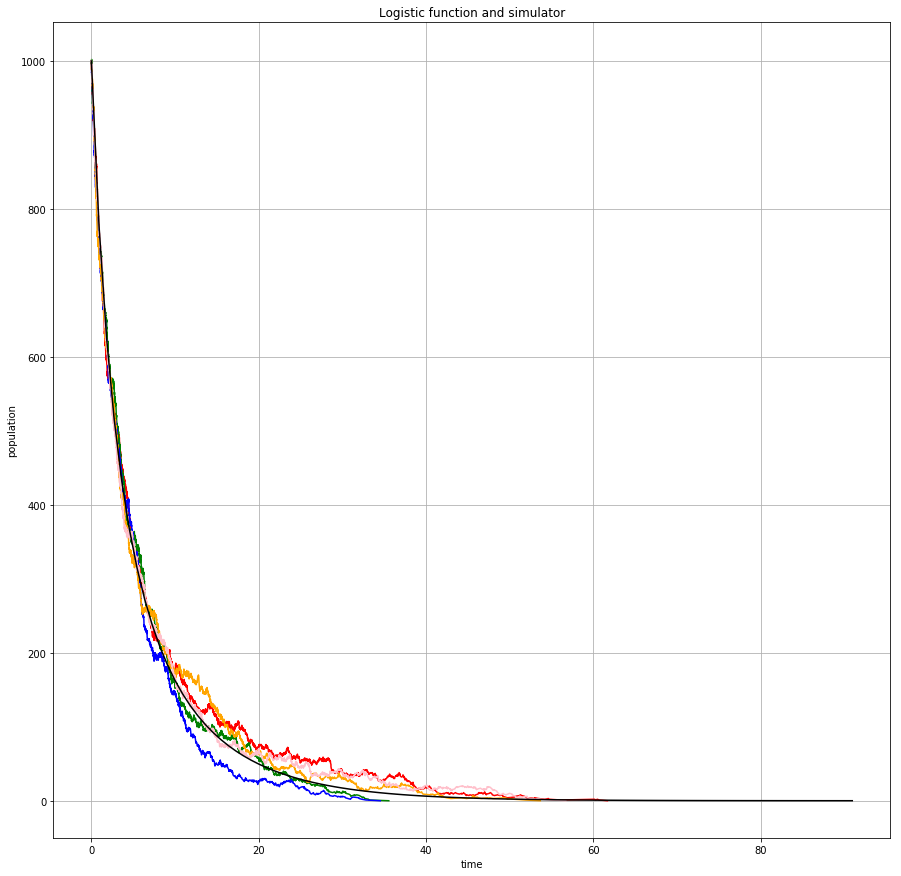

In [64]:
graphics(0.4, 0.5, 0.0002, 1000, 0)

probability of birth: 0.4
probability of death: 0.2
probability of murder: 0
population: 1000
end time: 25
1 done
2 done
3 done
4 done
5 done


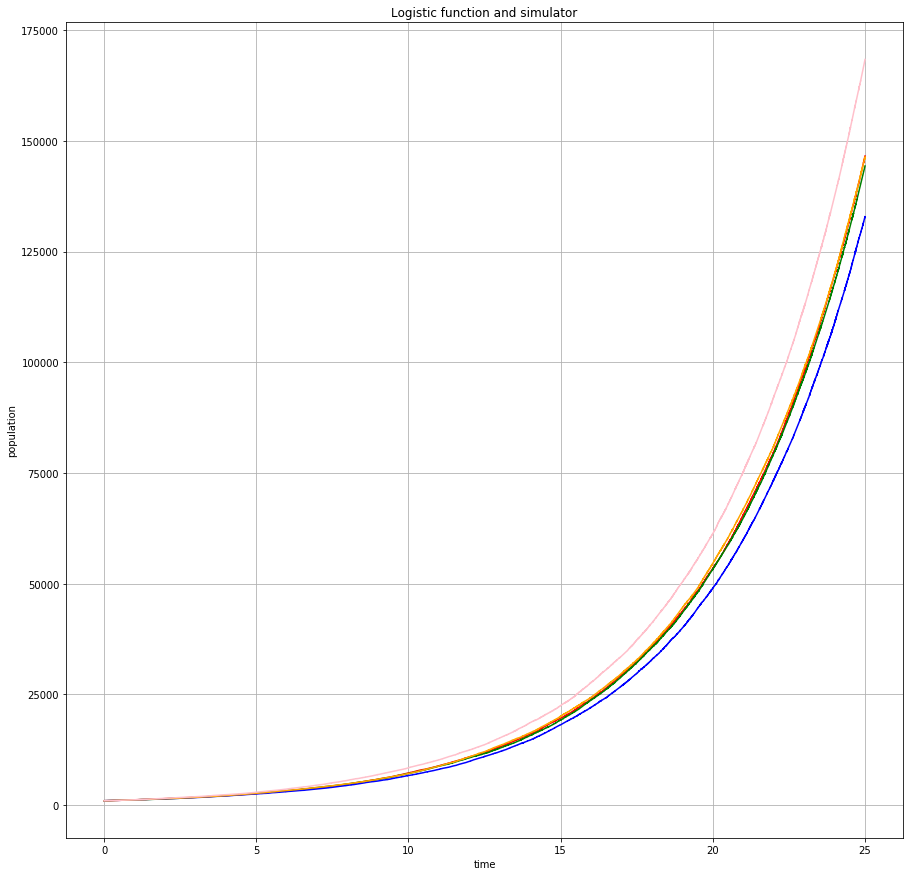

In [66]:
graphics(0.4, 0.2, 0, 1000, 25)

probability of birth: 0.4
probability of death: 0.2
probability of murder: 0.0002
population: 1500
end time: 111.13580795732385
1 done
2 done
3 done
4 done
5 done


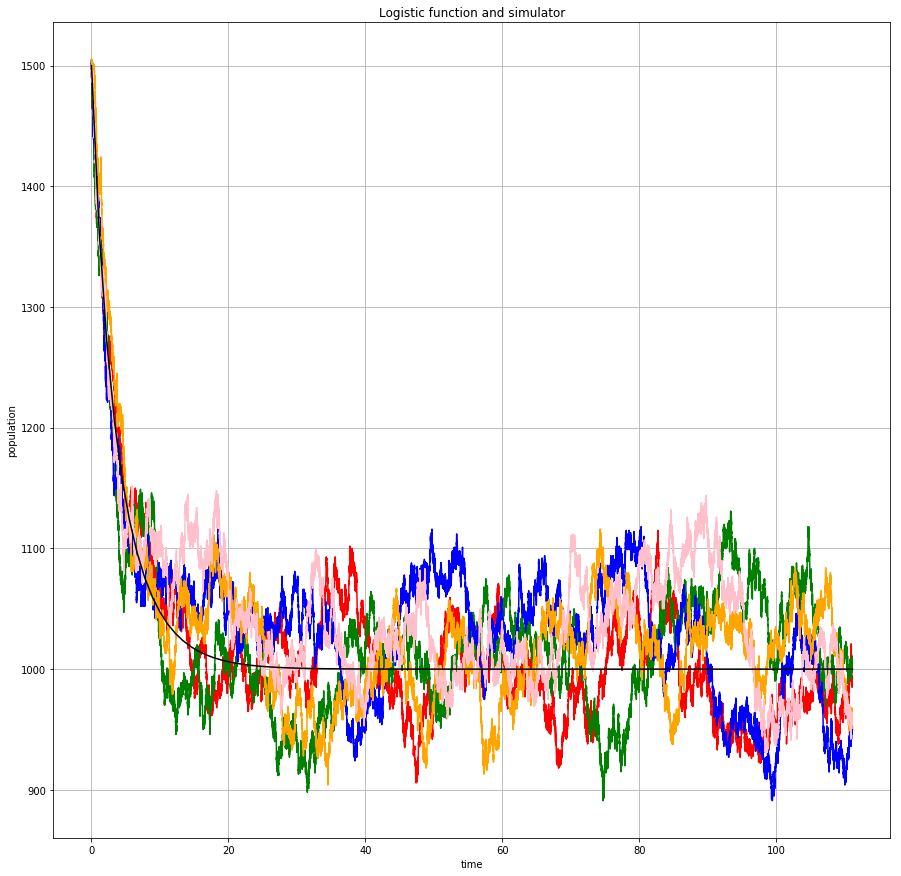

In [120]:
graphics(0.4, 0.2, 0.0002, 1500, 0)

probability of birth: 0.4
probability of death: 0.2
probability of murder: 0.0002
population: 1500
end time: 111.13580795732385
1 done
2 done
3 done
4 done
5 done


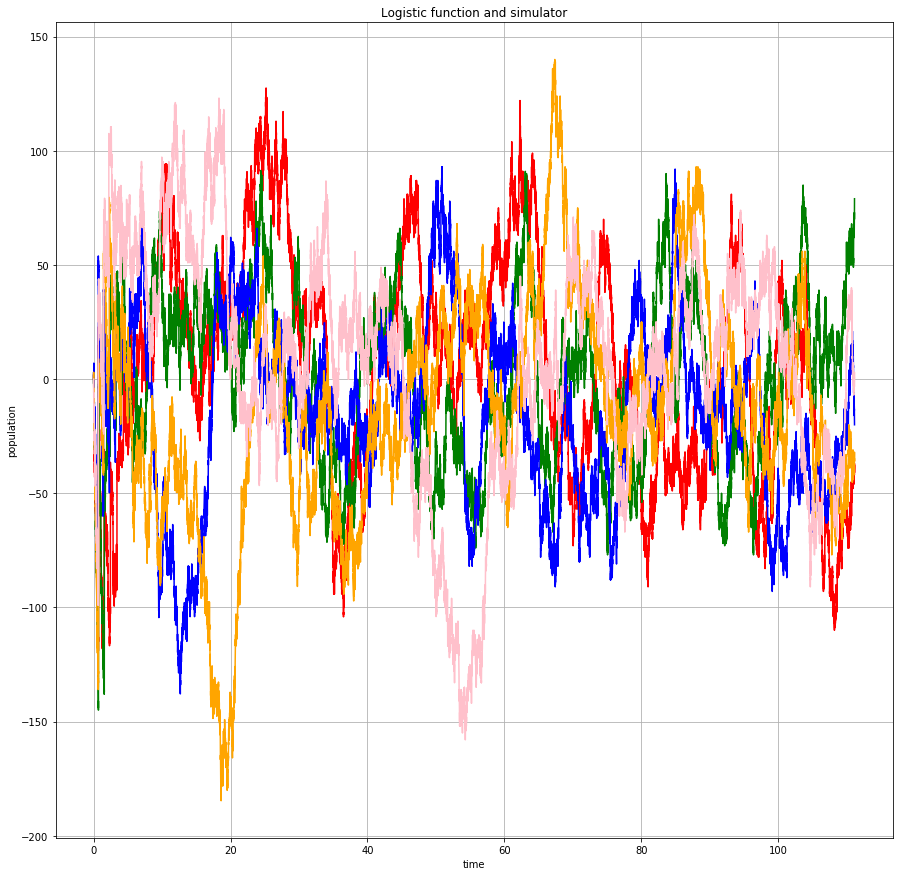

In [125]:
difference_graph(0.4, 0.2, 0.0002, 1500, 0)